In [1]:
#Library
import numpy as np
import random
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers.legacy import Adam

In [4]:
#Load Dataset 
path = './dataset/'
dataset = []
class_names = ['ace-of-diamonds', 'five-of-spades', 'jack-of-hearts', 'six-of-diamonds']

for class_dir in os.listdir(path):
    for image in os.listdir(path + class_dir):
        image_path = path + class_dir + '/' + image
        image_arr = tf.keras.utils.load_img(image_path, color_mode='grayscale')
        image_arr = np.array(image_arr)
        dataset.append((image_arr, class_names.index(class_dir)))

random.shuffle(dataset)
print(dataset)

[(array([[255, 255, 254, ..., 255, 255, 255],
       [255, 254, 254, ..., 252, 253, 254],
       [253, 253, 254, ..., 252, 252, 252],
       ...,
       [255, 254, 253, ..., 249, 245, 245],
       [254, 254, 253, ..., 247, 240, 238],
       [254, 255, 255, ..., 243, 230, 226]], dtype=uint8), 2), (array([[254, 254, 255, ..., 255, 255, 255],
       [254, 254, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8), 2), (array([[2, 0, 3, ..., 0, 0, 1],
       [0, 0, 0, ..., 4, 0, 0],
       [0, 8, 0, ..., 0, 4, 3],
       ...,
       [0, 2, 5, ..., 1, 3, 3],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 1, 0]], dtype=uint8), 0), (array([[254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       ...,
       [254, 254, 254, ..., 254, 254, 

In [5]:
##Split Dataset

X = []
y = []

for image,label in dataset:
    X.append(image)
    y.append(label)

X = np.array(X)
y = np.array(y)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=69)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=69)

print(X_train)

[[[255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  ...
  [255 254 254 ... 255 255 255]
  [255 254 254 ... 255 255 255]
  [255 255 255 ... 255 255 255]]

 [[255 254 254 ... 255 255 255]
  [253 255 255 ... 253 254 255]
  [255 255 254 ... 255 255 255]
  ...
  [255 253 255 ... 255 252 253]
  [255 255 254 ... 255 255 255]
  [255 255 255 ... 254 255 252]]

 [[251 251 253 ... 249 254 252]
  [253 253 253 ... 252 249 248]
  [254 252 251 ... 253 245 244]
  ...
  [251 251 251 ... 157 168 176]
  [255 254 254 ... 166 177 184]
  [255 255 255 ... 176 187 191]]

 ...

 [[249 249 249 ... 250 250 250]
  [249 249 250 ... 252 252 252]
  [250 250 250 ... 253 253 253]
  ...
  [251 251 251 ... 251 252 252]
  [251 251 251 ... 251 251 252]
  [251 251 251 ... 251 251 251]]

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0  

In [6]:
#Preprocessing Data
#Normalization
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1).astype('float32') / 255.0
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], X_val.shape[2], 1).astype('float32') / 255.0
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1).astype('float32') / 255.0

#Categorical Encoding 
y_train = tf.keras.utils.to_categorical(y_train, 4)
y_val = tf.keras.utils.to_categorical(y_val, 4)
y_test = tf.keras.utils.to_categorical(y_test, 4)

print(X_train.shape)

(413, 224, 224, 1)


In [7]:
#DCNN Architecture 
model = Sequential([
    #Input & Hidden Layer
    Conv2D(32, kernel_size=(5,5), activation='relu', input_shape=(224,224,1)),
    MaxPooling2D(2,2),
    Conv2D(64, kernel_size=(5,5), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, kernel_size=(5,5), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),

    #Fully Connected Layer
    Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(rate=0.7),
    Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(rate=0.2),

    #Output Layer
    Dense(4, activation='softmax')
])

In [9]:
#Train
model.compile(
    optimizer = Adam(),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

history = model.fit(
    X_train, y_train,
    validation_data = (X_val, y_val),
    epochs = 10,
    batch_size = 100
)

Epoch 1/10
5/5 [==============================] - 43s 7s/step - loss: 1.9986 - accuracy: 0.7869 - val_loss: 1.7791 - val_accuracy: 0.8427
Epoch 2/10
5/5 [==============================] - 43s 8s/step - loss: 1.7523 - accuracy: 0.8571 - val_loss: 1.7436 - val_accuracy: 0.8427
Epoch 3/10
5/5 [==============================] - 41s 9s/step - loss: 1.5900 - accuracy: 0.8814 - val_loss: 1.7154 - val_accuracy: 0.8539
Epoch 4/10
5/5 [==============================] - 44s 8s/step - loss: 1.6208 - accuracy: 0.8596 - val_loss: 1.6829 - val_accuracy: 0.8202
Epoch 5/10
5/5 [==============================] - 59s 13s/step - loss: 1.4588 - accuracy: 0.8717 - val_loss: 1.5429 - val_accuracy: 0.8764
Epoch 6/10
5/5 [==============================] - 43s 9s/step - loss: 1.3683 - accuracy: 0.8935 - val_loss: 1.5126 - val_accuracy: 0.8539
Epoch 7/10
5/5 [==============================] - 48s 9s/step - loss: 1.2929 - accuracy: 0.9104 - val_loss: 1.4995 - val_accuracy: 0.8539
Epoch 8/10
5/5 [=================

In [10]:
#Predict 
predict = model.predict(X_test)
predict_label = np.argmax(predict, axis=1)

#Evaluate 
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Loss : {test_loss}")
print(f"Test Accuracy : {test_acc}")

3/3 [==============================] - 1s 306ms/step - loss: 1.4884 - accuracy: 0.8427
Test Loss : 1.4883559942245483
Test Accuracy : 0.8426966071128845


{'loss': [1.998563289642334, 1.7522588968276978, 1.589951515197754, 1.6207880973815918, 1.4587655067443848, 1.3683171272277832, 1.2929084300994873, 1.1918214559555054, 1.1472694873809814, 1.1498510837554932], 'accuracy': [0.7869249582290649, 0.8571428656578064, 0.8813559412956238, 0.8595641851425171, 0.8716707229614258, 0.8934624791145325, 0.9104115962982178, 0.9370459914207458, 0.9200968742370605, 0.9273607730865479], 'val_loss': [1.7791179418563843, 1.7436017990112305, 1.7154271602630615, 1.6828742027282715, 1.5429432392120361, 1.5125541687011719, 1.4995336532592773, 1.39915132522583, 1.4918807744979858, 1.4732064008712769], 'val_accuracy': [0.8426966071128845, 0.8426966071128845, 0.8539325594902039, 0.8202247023582458, 0.8764045238494873, 0.8539325594902039, 0.8539325594902039, 0.8651685118675232, 0.8764045238494873, 0.8539325594902039]}


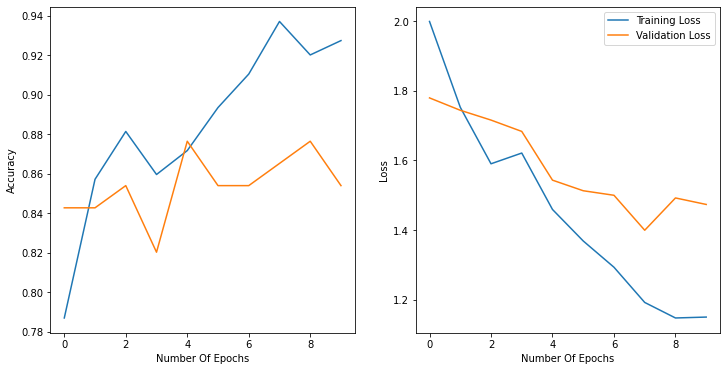

In [12]:
#Plot 
metrics = history.history
print(metrics)

plt.figure(figsize=(12,6))

#Accuracy
plt.subplot(1,2,1)
plt.plot(metrics['accuracy'], label='Training Accuracy')
plt.plot(metrics['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Number Of Epochs")
plt.ylabel("Accuracy")

#Loss
plt.subplot(1,2,2)
plt.plot(metrics['loss'], label='Training Loss')
plt.plot(metrics['val_loss'], label='Validation Loss')
plt.xlabel("Number Of Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [21]:
%pip install visualkeras

  Using cached visualkeras-0.0.2-py3-none-any.whl (12 kB)
  Obtaining dependency information for aggdraw>=1.3.11 from https://files.pythonhosted.org/packages/95/80/67127b37624e3092699c999e0c430e3f6b39f0deef3b4e135f8f9189d03c/aggdraw-1.3.18-cp310-cp310-win_amd64.whl.metadata
   ---------------------------------------- 44.9/44.9 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


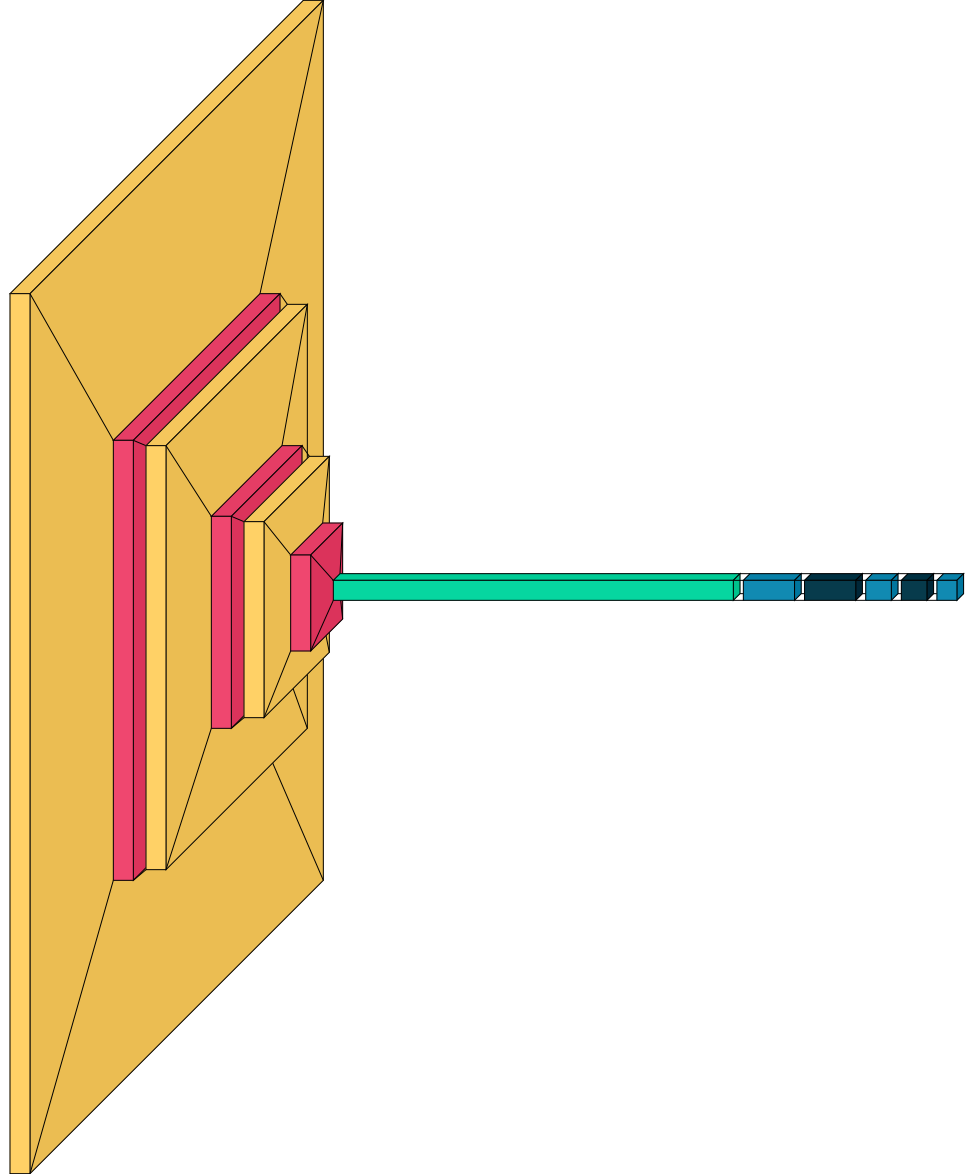

In [22]:
import visualkeras
visualkeras.layered_view(model)